<center><h1>Ejercicio - Clasificación desde la econometría</h1></center>

En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:

- [sbp]: Presión Sanguínea Sistólica.
- [tobacco]: Promedio tabaco consumido por día.
- [ldl]: Lipoproteína de baja densidad.
- [adiposity]: Adiposidad.
- [famhist]: Antecedentes familiares de enfermedades cardiácas. (Binaria)
- [types]: Personalidad tipo A
- [obesity]: Obesidad.
- [alcohol]: Consumo actual de alcohol.
- [age]: edad.
- [chd]: Enfermedad coronaria. (dummy)

<center><h2>Parte 1: Preparar el ambiente de trabajo</h2></center>

- Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
- Importe el archivo southafricanheart.csv que se encuentra dentro del material de apoyo.
- Realice una descripción del set importado mostrando:
  - lista con los nombres de variables importadas
  - un análisis descriptivo mediante `.describe()`
  - distribución de categorías para las variables `famhist` y `chd`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("southafricanheart.csv")
df = df.drop(columns = "Unnamed: 0")

In [3]:
df.head(3)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0


In [4]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

A continuacion graficamos las columnas para tener una mejor perspectiva de su comportamiento

C:\Users\lanze\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lanze\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lanze\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

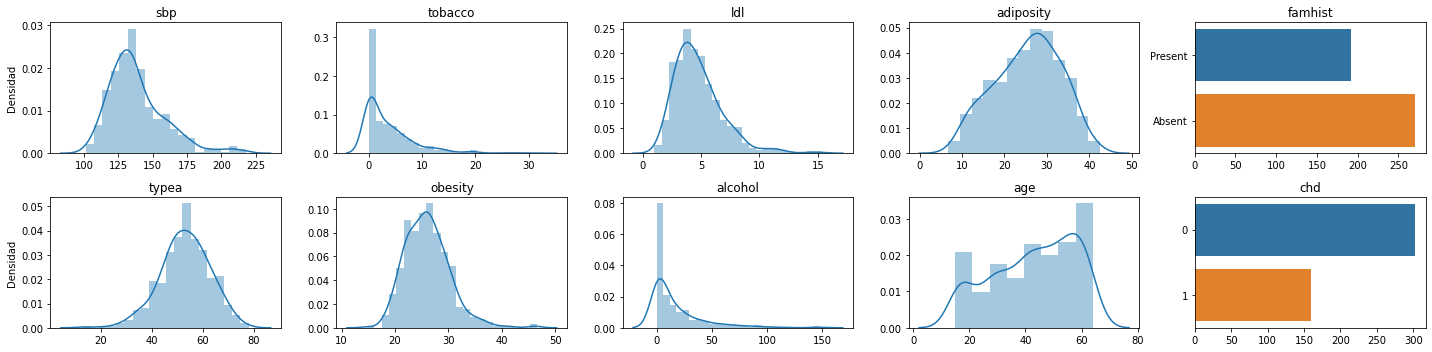

In [5]:
plt.figure(figsize = (20,5))
for n, i in enumerate(df):
    plt.subplot(2, 5, n+1)
    if len(df[i].value_counts()) > 2:
        sns.distplot(df[i])
        plt.title(i)
        plt.xlabel("")
        if n==0 or n==5:
            plt.ylabel("Densidad")
        else:
            plt.ylabel("")
    else:
        sns.countplot(y=df[i])
        plt.title(i)
        plt.xlabel("")
        plt.ylabel("")
    plt.tight_layout()

Se ve que para 'tobaco' y 'alcohol' los valores toman mayoritariamente valores bajos, por lo que se aprecia un sesgo hacia los valores bajos para estos datos

In [6]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [7]:
df["famhist"].value_counts("%").round(3)

Absent     0.584
Present    0.416
Name: famhist, dtype: float64

In [8]:
df["chd"].value_counts("%").round(3)

0    0.654
1    0.346
Name: chd, dtype: float64

<center><h2>Parte 2</h2></center>

A continuación se presenta el siguiente modelo a estimar:

$$\log\left(\frac{\text{Pr}(\text{chd}=1)}{1-\text{Pr}(\text{chd}=1)} \right)=\beta_0+\beta_1\cdot\text{famhist}$$

Para ello ejecute los siguientes pasos:

1. Recodifique `famhist` a dummy, asignando 1 a la categoría minoritaria.

In [9]:
df["binarize_famhist"] = np.where(df["famhist"] == "Present", 1, 0)

2. Utilice `smf.logit` para estimar el modelo.

In [10]:
m1_logit = smf.logit('chd ~ binarize_famhist', df).fit()
#m1_logit

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


3. Implemente una función `inverse_logit` que realice el mapeo de log-odds a probabilidad.

In [11]:
def inverse_logit(x):
    ''' This function maps 'x' from log-odds to probability
    :param x: value to inverse
    :return: inverse logit value
    '''
    return 1/(1 + np.exp(-x))

In [12]:
m1_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.057     
Dependent Variable: chd              AIC:              565.8944  
Date:               2021-05-27 21:21 BIC:              574.1655  
No. Observations:   462              Log-Likelihood:   -280.95   
Df Model:           1                LL-Null:          -298.05   
Df Residuals:       460              LLR p-value:      4.9371e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -1.1690   0.1431 -8.1687 0.0000 -1.4495 -0.8885
binarize_famhist   1.1690   0.2033  5.7514 0.0000  0.7706  1.5674
=================================================================

"""

4. Con el modelo estimado, responda lo siguiente:

In [13]:
intercepto = m1_logit.summary2().tables[1].loc["Intercept"]["Coef."]
B1 = m1_logit.summary2().tables[1].loc["binarize_famhist"]["Coef."] 
estimate_0 = intercepto + (B1 * 0) 
estimate_1 = intercepto + (B1 * 1) 

In [14]:
m1_logit.summary2().tables[1].loc["binarize_famhist"]

Coef.       1.168993e+00
Std.Err.    2.032553e-01
z           5.751355e+00
P>|z|       8.853123e-09
[0.025      7.706201e-01
0.975]      1.567366e+00
Name: binarize_famhist, dtype: float64

¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [15]:
print(f'La probabilidad es: {round(inverse_logit(estimate_0),3)}')

La probabilidad es: 0.237


¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?

In [16]:
print(f'La probabilidad es: {round(inverse_logit(estimate_1),3)}')

La probabilidad es: 0.5


¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [17]:
diferencia = inverse_logit(estimate_1) - inverse_logit(estimate_0)
print(f'La diferencia en la probabilidad es: {round(diferencia,3)}')

La diferencia en la probabilidad es: 0.263


Replique el modelo con [smf.ols] y comente las similitudes entre los coeficientes estimados. **Tip:** Utilice $\beta/4$

In [18]:
modelo_ols = smf.ols('chd ~ binarize_famhist', df).fit()
modelo_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.072   
Dependent Variable: chd              AIC:                593.1725
Date:               2021-05-27 21:21 BIC:                601.4437
No. Observations:   462              Log-Likelihood:     -294.59 
Df Model:           1                F-statistic:        36.86   
Df Residuals:       460              Prob (F-statistic): 2.66e-09
R-squared:          0.074            Scale:              0.21050 
------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept         0.2370    0.0279  8.4893  0.0000  0.1822  0.2919
binarize_famhist  0.2630    0.0433  6.0713  0.0000  0.1778  0.3481
-----------------------------------------------------------------
Omnibus:             768.898       Durbin-Watson:          1.961 
Prob(Omnibus):       0.000         Jarque-Bera (JB):       58.778
Skew:                0.579         Prob(JB):               0.000 
Kurtosis:            1.692         Condition No.:          2     
=================================================================

"""

In [19]:
intercepto_ols = modelo_ols.summary2().tables[1].loc["Intercept"]["Coef."]
B1_ols = modelo_ols.summary2().tables[1].loc["binarize_famhist"]["Coef."] 
estimate_ols_0 = intercepto_ols + (B1_ols * 0)
estimate_ols_1 = intercepto_ols + (B1_ols * 1)

In [20]:
round(estimate_ols_0,3)

0.237

In [21]:
round(estimate_ols_1,3)

0.5

In [22]:
#B1
print(B1/4)
print(B1_ols)

0.2922482713574773
0.26296296296296257


<center><h2>Parte 3: Estimación completa</h2></center>

Implemente un modelo con la siguiente forma:

$$\log\left(\frac{\text{Pr}(\text{chd}=1)}{1-\text{Pr}(\text{chd}=1)} \right)=\beta_0+\sum^N_{j=1}\beta_1\cdot X$$

- Depure el modelo manteniendo las variables con significancia estadística al 95%.
- Compare los estadísticos de bondad de ajuste entre ambos.
- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [23]:
for i in df:
    if df[i].dtype == np.float64 or df[i].dtype == np.int64:
        media = df[i].dropna().mean(); var = df[i].dropna().var()
        df[f"z_{i}"] = (df[i] - media)/var

In [24]:
mtotal_test_logit = smf.logit('chd ~ z_sbp + z_tobacco + z_ldl + z_adiposity + binarize_famhist + z_typea + z_obesity + z_alcohol + z_age', df).fit()
mtotal_test_logit.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Thu, 27 May 2021   Pseudo R-squ.:                  0.2080
Time:                        21:21:22   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2631      0.165     -7.646      0.000      -1.587      -0.939
z_sbp                2.7323      2.407      1.135      0.256      -1.986       7.451
z_tobacco            1.6745      0.561      2.984      0.003       0.575       2.774
z_ldl                0.7459      0.256      2.915      0.004       0.244       1.247
z_adiposity          1.1252      1.773      0.635      0.526      -2.350       4.601
binarize_famhist     0.9254      0.228      4.061      0.000       0.479       1.372
z_typea              3.8163      1.187      3.214      0.001       1.489       6.144
z_obesity           -1.1170      0.786     -1.422      0.155      -2.657       0.423
z_alcohol            0.0729      2.687      0.027      0.978      -5.193       5.339
z_age                9.6521      2.589      3.728      0.000       4.578      14.726
====================================================================================
"""

Los valores de $P> \lvert z \rvert$ menores a 0.05 se presentan en 'tobacco', 'ldl', 'famhist', 'typea' y 'age'.

Por lo tanto usamos estos para entrenar el modelo.

In [25]:
mtotal_logit = smf.logit('chd ~ z_tobacco + z_ldl + binarize_famhist + z_typea + z_age', df).fit()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


In [26]:
mtotal_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 May 2021   Pseudo R-squ.:                  0.2020
Time:                        21:21:22   Log-Likelihood:                -237.84
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.554e-24
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2549      0.165     -7.622      0.000      -1.578      -0.932
z_tobacco            1.6956      0.546      3.106      0.002       0.626       2.766
z_ldl                0.6947      0.236      2.947      0.003       0.233       1.157
binarize_famhist     0.9082      0.226      4.023      0.000       0.466       1.351
z_typea              3.5773      1.173      3.051      0.002       1.279       5.876
z_age               10.7693      2.178      4.944      0.000       6.500      15.039
====================================================================================
"""

In [27]:
R2_m1 = float(m1_logit.summary2().tables[0][3][0])
R2_mtotal = float(mtotal_logit.summary2().tables[0][3][0])
print("El pseudo R2 de m1 es " + str(R2_m1))
print("El pseudo R2 de mtotal es " + str(R2_mtotal)) 

El pseudo R2 de m1 es 0.057
El pseudo R2 de mtotal es 0.202


Como se ve, al usar la totalidad de los datos aumento el R2, aunque esto es algo esperado, al ser grande el cambio podemos interpretar que usar solo famhist para hacer la prediccion no es un buen parametro para categorizar toda la regresion, es mejor seguir explorando para ver cuales son los mejores predictores para el modelo.

In [28]:
def concise_summary(mod, print_fit=True):
    ''' Print a consice summary of an fitted model
    :param mod: fitted model
    :param print_fit: if True show the 'Goodness of Fit statistics'
    :type print_fit: Boolean
    '''
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:], 'Value': mod.summary2().tables[0][3][2:]})
    estimates = pd.DataFrame(mod.summary2().tables[1].loc[:, 'Coef.': 'Std.Err.'])
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
    print("\nPoint Estimates\n\n", estimates)

In [29]:
concise_summary(mtotal_logit)


Goodness of Fit statistics
         Statistics       Value
2             BIC:    512.4990
3  Log-Likelihood:     -237.84
4         LL-Null:     -298.05
5     LLR p-value:  2.5537e-24
6           Scale:      1.0000
7                             

Point Estimates

                       Coef.  Std.Err.
Intercept         -1.254860  0.164645
z_tobacco          1.695587  0.545954
z_ldl              0.694728  0.235743
binarize_famhist   0.908175  0.225758
z_typea            3.577312  1.172681
z_age             10.769336  2.178194


In [30]:
concise_summary(m1_logit)


Goodness of Fit statistics
         Statistics       Value
2             BIC:    574.1655
3  Log-Likelihood:     -280.95
4         LL-Null:     -298.05
5     LLR p-value:  4.9371e-09
6           Scale:      1.0000
7                             

Point Estimates

                      Coef.  Std.Err.
Intercept        -1.168993  0.143106
binarize_famhist  1.168993  0.203255


<center><h2>Parte 4: Estimación de perfiles</h2></center>

A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con `inverse_logit`. Los perfiles a estimar son los siguientes:
- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, **manteniendo todas las demás características constantes**.
- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, **manteniendo todas las demás características constantes**.


In [31]:
#variables = ["tobacco", "ldl", "binarize_famhist", "typea", "age"]
intercepto = mtotal_logit.summary2().tables[1].loc["Intercept"]["Coef."]

B1_mtotal = mtotal_logit.summary2().tables[1].loc["z_tobacco"]["Coef."] 
B2_mtotal = mtotal_logit.summary2().tables[1].loc["z_ldl"]["Coef."]     
B3_mtotal = mtotal_logit.summary2().tables[1].loc["binarize_famhist"]["Coef."] 
B4_mtotal = mtotal_logit.summary2().tables[1].loc["z_typea"]["Coef."] 
B5_mtotal = mtotal_logit.summary2().tables[1].loc["z_age"]["Coef."]

In [32]:
estimate_multiple = intercepto + (B1_mtotal * df["z_tobacco"].mean())+ (B2_mtotal * df["z_ldl"].mean())+ (B3_mtotal * df["binarize_famhist"].mean())+ (B4_mtotal * df["z_typea"].mean())+ (B5_mtotal * df["z_age"].mean())

In [33]:
print('La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es',round(inverse_logit(estimate_multiple),3))

La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra es 0.294


In [34]:
lbl_25 = df["z_ldl"].quantile(0.25)
lbl_75 = df["z_ldl"].quantile(0.75)
estimate_multiple_lbl_75 = intercepto + (B1_mtotal * df["z_tobacco"].mean())+ (B2_mtotal * lbl_75)+ (B3_mtotal * df["binarize_famhist"].mean())+ (B4_mtotal * df["z_typea"].mean())+ (B5_mtotal * df["z_age"].mean())

In [35]:
print('La probabilidad de tener una enfermedad coronaria para un individuo con','\033[1m','altos niveles','\033[0m','de lipoproteína de baja densidad, anteniendo todas las demás características constantes es de', round(inverse_logit(estimate_multiple_lbl_75),3))

La probabilidad de tener una enfermedad coronaria para un individuo con  altos niveles  de lipoproteína de baja densidad, anteniendo todas las demás características constantes es de 0.33


In [36]:
 estimate_multiple_lbl_25 = intercepto + (B1_mtotal * df["z_tobacco"].mean())+ (B2_mtotal * lbl_25)+ (B3_mtotal * df["binarize_famhist"].mean())+ (B4_mtotal * df["z_typea"].mean())+ (B5_mtotal * df["z_age"].mean())

In [37]:
print('La probabilidad de tener una enfermedad coronaria para un individuo con','\033[1m','bajos niveles','\033[0m','de lipoproteína de baja densidad, anteniendo todas las demás características constantes es de', round(inverse_logit(estimate_multiple_lbl_25),3))

La probabilidad de tener una enfermedad coronaria para un individuo con  bajos niveles  de lipoproteína de baja densidad, anteniendo todas las demás características constantes es de 0.247


Como podemos ver, al tener altos niveles de lbl aumenta la probabilidad de tener un enfermedad coronaria.